In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [36]:
def Integrator3(fx, fy, r0, t, b):
    h = t[1] - t[0]

    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)

    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]

    K1 = np.zeros(6)
    K2 = np.zeros(6)

    R = np.zeros(6)

    for i in range(1, len(t)):
        R = np.array([x[i-1], y[i-1], z[i-1], vx[i-1], vy[i-1], vz[i-1]])
        K1[0] = vx[i-1]
        K1[1] = vy[i-1]
        K1[2] = vz[i-1]
        K1[3] = fx(R, t[i-1], b)
        K1[4] = fy(R, t[i-1], b)
        K1[5] = 0

        R = np.array([x[i-1]+h*K1[0], y[i-1]+h*K1[1], z[i-1]+h*K1[2],
                      vx[i-1]+h*K1[3], vy[i-1]+h*K1[4], vz[i-1]+h*K1[5]])
        K2[0] = R[3]
        K2[1] = R[4]
        K2[2] = R[5]
        K2[3] = fx(R, t[i-1]+h, b)
        K2[4] = fy(R, t[i-1]+h, b)
        K2[5] = 0

        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        z[i] = z[i-1] + 0.5*h*(K1[2]+K2[2])

        vx[i] = vx[i-1] + 0.5*h*(K1[3]+K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4]+K2[4])
        vz[i] = vz[i-1] + 0.5*h*(K1[5]+K2[5])

    return x, y, z, vx, vy, vz


In [32]:
w0=1
w=0.3

In [33]:
def fx(R, t, b):
  return -w0*R[4]*np.sin(w*t)

In [34]:
def fy(R, t, b):
  return w0*R[3]*np.sin(w*t)

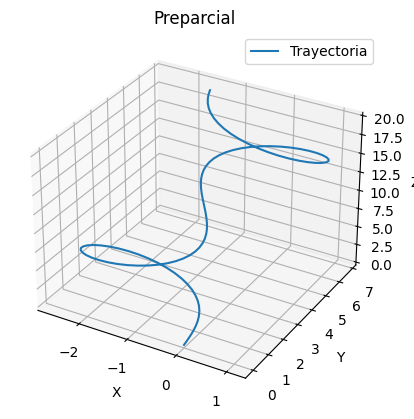

In [38]:
# Define la función f(R, t, b) aquí si aún no está definida

# Define las condiciones iniciales y el intervalo de tiempo
r0 = [0, 0, 0, 0, 1, 1]  # Posiciones y velocidades iniciales: (x, y, z, vx, vy, vz)
t = np.linspace(0, 20, 100)
x, y, z, vx, vy, vz = Integrator3(fx, fy, r0, t, b=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Trayectoria')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Preparcial')

ax.legend()
plt.show()
